# **Malaria Detection**

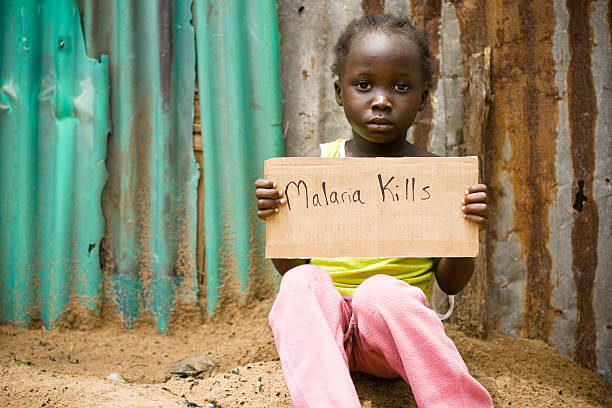

Source: iStock

## **Context**
Malaria is a lethal disease claiming hundreds of thousands of lives annually, it is endemic in Sub-Saharan Africa and disproportionately affects young children under the age of 5.  Malaria is caused by Plasmodium parasites that are transmitted through the bites of infected female Anopheles mosquitos.  Early detection is important because the parasites can live for more than a year damaging red blood cells in an infected person without showing symptoms which can result in treatment complications and fatality.

Laboratory diagnosis requires careful inspection to determine if red blood cells are infected or not, it is a time-consuming process with diagnostic accuracy complicated by inter-observer variability.  Automated malaria detection via Machine Learning could significantly reduce or potentially eliminate these issues with detection that is both sensitive and specific, thus a Deep Learning algorithm for malaria classification would be greatly beneficial.

## **Objectives**
The objective of this project is to build an efficient computer vision model to detect malaria. The model should identify whether the image of a red blood cell is infected with malaria or not, and classify the image as parasitized or uninfected, respectively.

The project objective entails the following tasks:
1. Load and understand the dataset
2. Import appropriate Python libraries for data analysis - utilize the os library to navigate the image data directories
3. Parse the parasitized and uninfected directories to classify cells as infected or not
4. Automatically label the images
5. Perform Data Augmentation to obtain more training data and enhance model robustness by reducing False Negatives through improved Recall
5. Build a classification model (infected or not infected cell) for this supervised learning problem using binary image classifiers (CNNs, SVM, Random Forest)
6. Improve the model's performance using various Machine Learning methods such as Transfer Learning

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


### <b> Mount the Drive </b>



In [ ]:
 # Mounting the drive
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [ ]:
# Importing required libraries
import zipfile

# Library for creating data paths
import os

# Python Image Library - PIL is integrated with Numpy and compatible with various image formats
from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:**
- Download the dataset here: [Dataset Link](https://drive.google.com/file/d/1n3o1Xghpy9ufZwHkQFE5l5d9sUHQOUWM/view) and upload the same to your Google Drive, then unzip the folder.

In [ ]:
 # Storing the path of the data file from the Google drive
 path = '/content/drive/MyDrive/Data/cell_images.zip'

 # The data is provided as a zip file so we need to extract the files from the zip file
 with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Storing the path of the extracted "train" folder
# train_dir = '/Users/beauchamp/great_learning/9. Capstone Projects/4. Deep Learning/cell_images/train'
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

#<------------------------------------------------------------------------------------------------->#

# Storing the path of the extracted "test" folder
# test_dir = '/Users/beauchamp/great_learning/9. Capstone Projects/4. Deep Learning/cell_images/test'
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# try except pass code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:

            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                train_labels.append(1)

            else:

                train_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

#<------------------------------------------------------------------------------------------------->#

# try except pass code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

### <b> Check the shape of train and test images </b>

In [ ]:
print('train_images 1st Image Shape:', train_images[0].shape, '\n')
print('test_images 1st Image Shape:', test_images[0].shape)

train_images 1st Image Shape: (64, 64, 3) 

test_images 1st Image Shape: (64, 64, 3)


### <b> Check the shape of train and test labels </b>

In [ ]:
print('train_labels images:', train_labels.shape, '\n')
print('test_labels images:', test_labels.shape)

train_labels images: (24958,) 

test_labels images: (2600,)


#### <b> Observations and insights: </b>
- We have 24,958 labeled training images and 2,600 labeled test images



### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
train_min_value = np.min(train_images)
train_max_value = np.max(train_images)

test_min_value = np.min(test_images)
test_max_value = np.max(test_images)

print("Train images minimum pixel value:", train_min_value)
print("Train images maximum pixel value:", train_max_value, '\n')

print("Test images minimum pixel value:", test_min_value)
print("Test images maximum pixel value:", test_max_value)

Train images minimum pixel value: 0
Train images maximum pixel value: 255 

Test images minimum pixel value: 0
Test images maximum pixel value: 255


#### <b> Observations and insights: </b>
- The minimum pixel value for each channel in an RBG image is 0, and the maximum pixel value for each channel is 255, indicating maximum color intensity, thus the entire pixel color range in an RGB image is from (0, 0, 0) (black) to (255, 255, 255) (white).  All other colors within the image can be represented by combinations of these values.



#### <b> Count the number of values in both uninfected and parasitized </b>

In [ ]:
# Calculate the count of True/Fales values of the train images
train_infected = train_labels == 1
infected_train_series = pd.Series(train_infected)
train_infected_count = infected_train_series.value_counts()

print("Train Images Infected - Uninfected:", '\n', train_infected_count, '\n')

# Calculate the count of True/Fales values of the test images
test_infected = test_labels == 1
infected_test_series = pd.Series(test_infected)
test_infected_count = infected_test_series.value_counts()

print("Test Images Infected - Uninfected:", '\n', test_infected_count)


Train Images Infected - Uninfected: 
 True     12582
False    12376
dtype: int64 

Test Images Infected - Uninfected: 
 True     1300
False    1300
dtype: int64


### <b>Normalize the images </b>

In [ ]:
# Normalizing the train and test images converting them to float32 and dividing by 255
train_images_normalized = train_images.astype('float32')/255.0
test_images_normalized = test_images.astype('float32')/255.0

#### <b> Observations and insights: </b>
- Train and Test images are nearly equally distributed between Infected and Uninfected, suggesting balanced datasets.

### <b> Plot to check if the data is balanced </b>

Text(0.5, 1.0, 'Class Distribution with 95% Confidence Intervals')

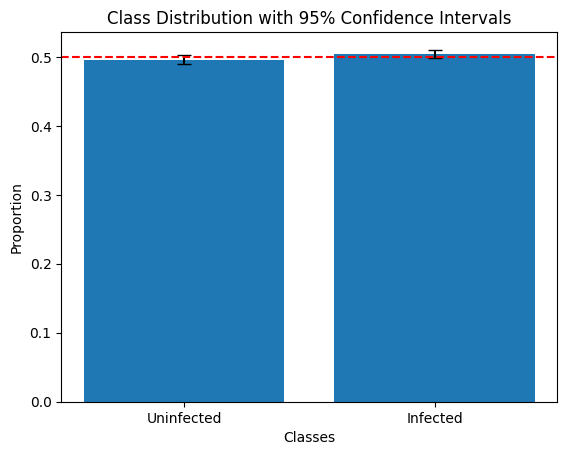

In [ ]:
# Calculate the count of each class in the train_labels array
class_counts = np.bincount(train_labels)

# Calculate the proportion of each class
class_proportions = class_counts / len(train_labels)

# Calculate the standard error for each class
standard_error = np.sqrt(class_proportions * (1 - class_proportions) / len(train_labels))

# Set up the bar chart
classes = ['Uninfected', 'Infected']
x = np.arange(len(classes))

# Create the bar chart with error bars
plt.bar(x, class_proportions, align='center', yerr=1.96 * standard_error, capsize=5)

# Add a horizontal line at the expected frequency of a balanced dataset
expected_frequency = 0.5
plt.axhline(expected_frequency, color='red', linestyle='--')

# Customize the plot
plt.xticks(x, classes)
plt.xlabel('Classes')
plt.ylabel('Proportion')
plt.title('Class Distribution with 95% Confidence Intervals')



#### <b> Observations and insights: </b>
- Train and Test datasets appear to be balanced between the Uninfected and Infected Classes.

### <b>Data Exploration</b>
Let's visualize the images from the train data

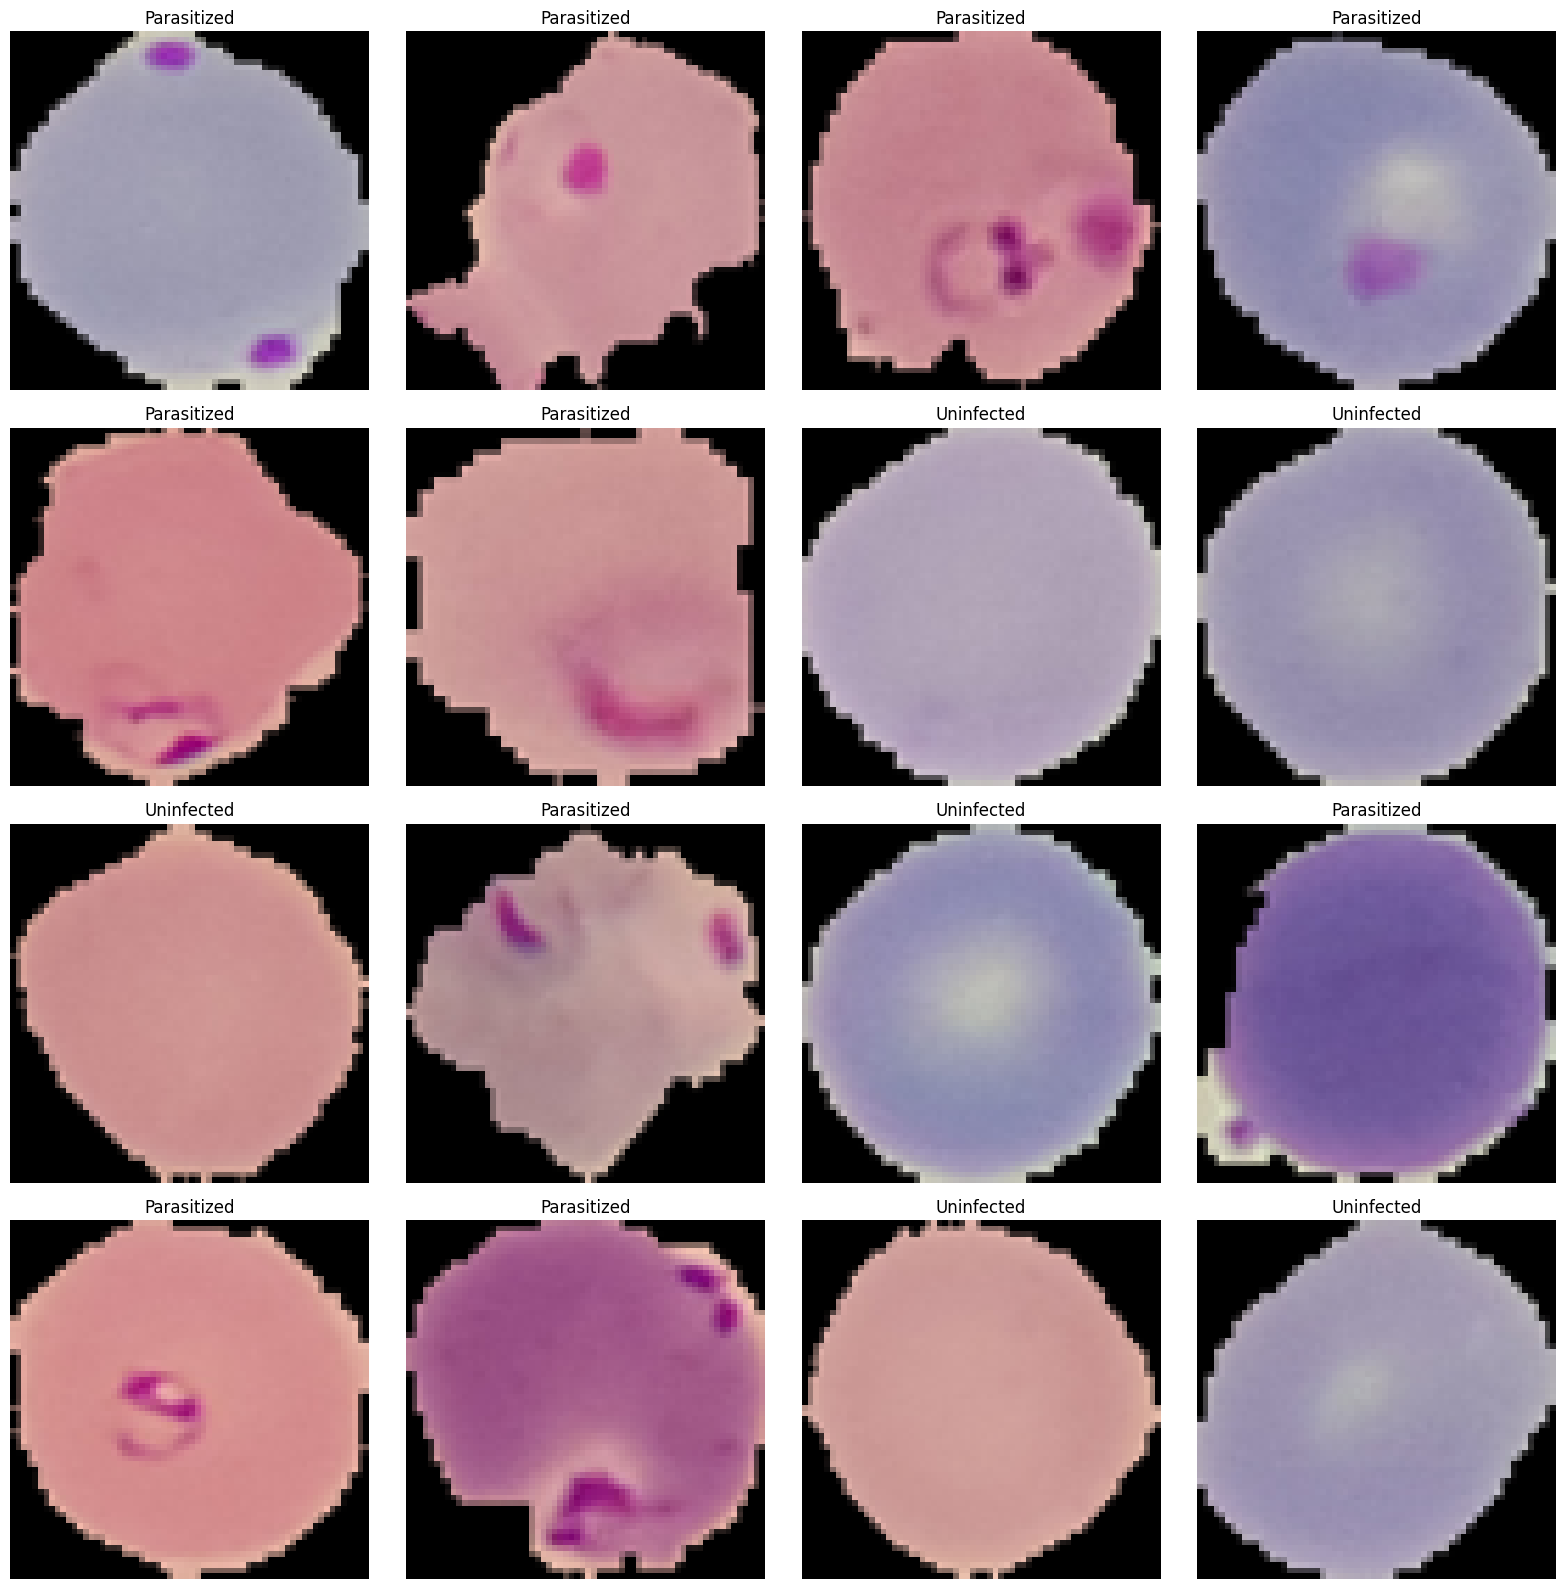

In [ ]:
# Visualizing both the parasitized and uninfected images
np.random.seed(23)

plt.figure(figsize=(16, 16))

for n in range(1, 17):
    plt.subplot(4, 4, n)

    index = np.random.randint(0, train_images.shape[0])

    if train_labels[index] == 1:
        plt.title('Parasitized')
    else:
        plt.title('Uninfected')

    plt.imshow(train_images[index])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### <b> Observations and insights: </b>
- The code generates 16 plots in a 4 x 4 grid and displays an image by randomly selecting an index within train_images arrays shape.  The images appear to be blury and the shape and the color of the images vary considerably for both the Parasitized and Uninfected cells.
- Parasitized cells generally appear to have darkened reddish or purple areas, although uninfected cell images have some as well which may be other impurities.

### <b> Visualize the images with subplot(6, 6) and figsize = (12, 12) </b>

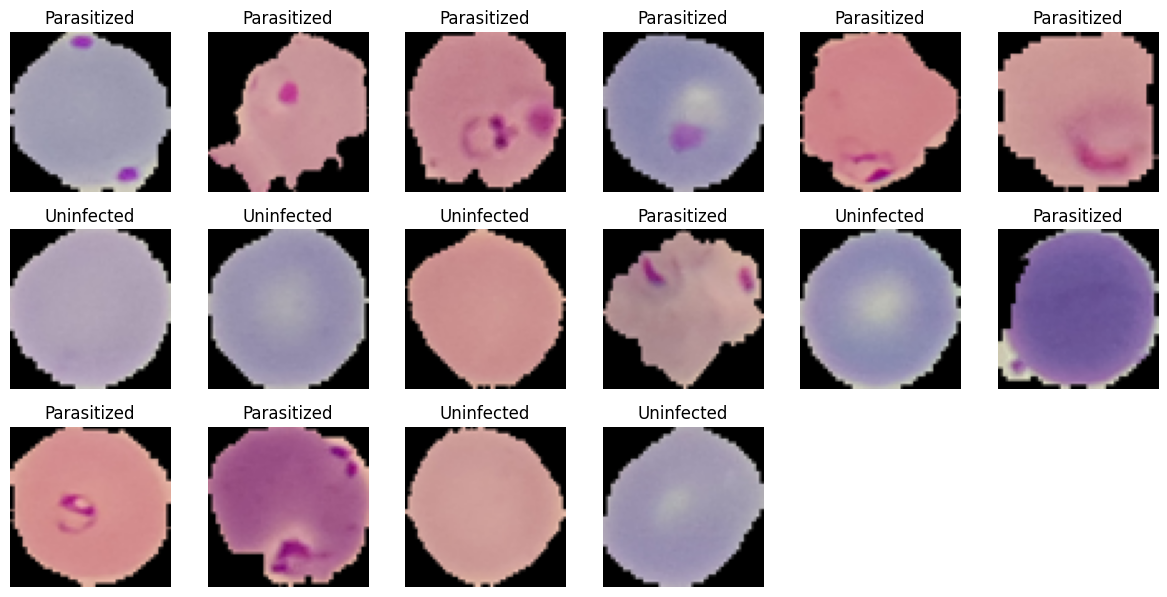

In [ ]:
np.random.seed(23)

plt.figure(figsize=(12, 12))

for n in range(1, 17):
    plt.subplot(6, 6, n)

    index = np.random.randint(0, train_images.shape[0])

    if train_labels[index] == 1:
        plt.title('Parasitized')
    else:
        plt.title('Uninfected')

    plt.imshow(train_images[index])
    plt.axis('off')

plt.tight_layout()
plt.show()



#### <b>Observations and insights: </b>
- The smaller 12 x 12 figsize in the 6 x 6 grid shows greater clarity, however shape and size variation is unchanged.

### <b> Plotting the mean images for parasitized and uninfected </b>

In [ ]:
# Normalized Mean Image Function
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Normalize the mean image to the range [0, 1]
    mean_img = (mean_img - np.min(mean_img)) / (np.max(mean_img) - np.min(mean_img))

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

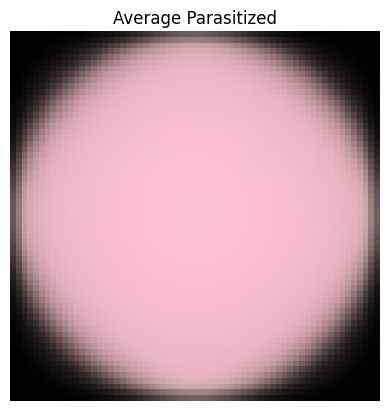

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:

              parasitized_data.append([img])

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

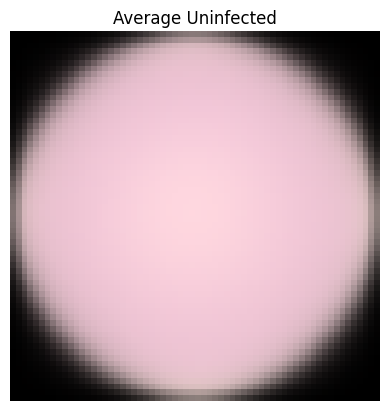

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
uninfected_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 0:

              uninfected_data.append([img])

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean




#### <b> Observations and insights: </b>
- The average infected image has a pinker hue which suggests the need to define color thresholds.
- Variance present could also result from light intensity variations, thus invariance to lighting conditions is indicated.
- RGB to HSV image conversion will make the model more robust since the HSV color space separates color information from intensity and makes it possible to define color thresholds.

### <b>Converting RGB to HSV of Images using OpenCV

### <b> Converting the train data </b>

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)

  gfx.append(a)

gfx = np.array(gfx)

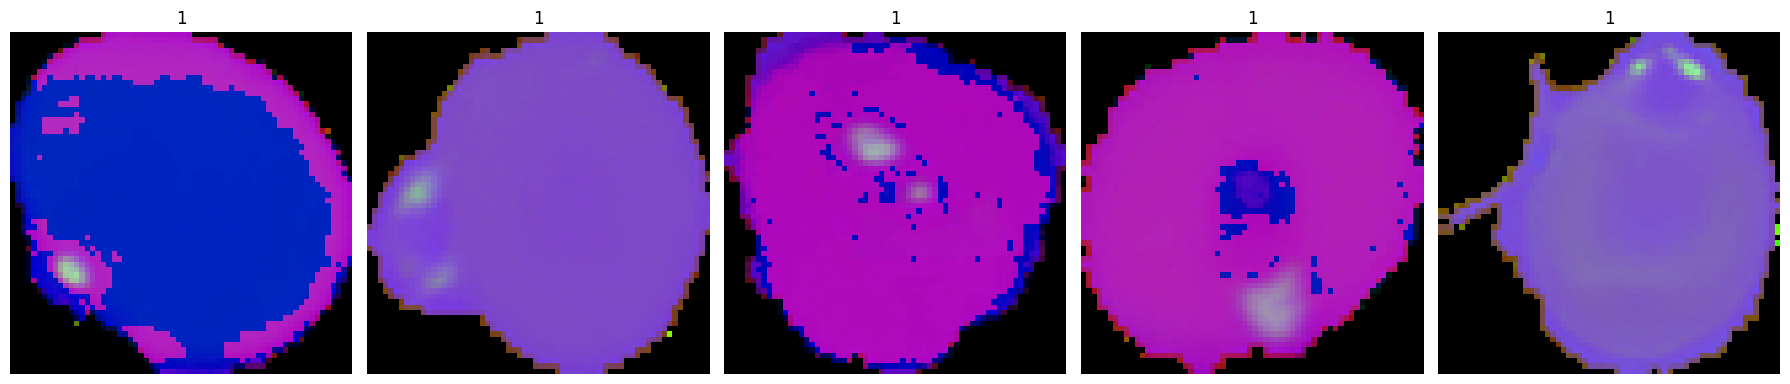

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

### <b> Converting the test data </b>

In [ ]:
gfx_test=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)

  gfx_test.append(a)

gfx_test = np.array(gfx_test)

#### <b>Observations and insights: </b>
- Choppy edges in all of the HSV images, preprocessing to smooth out these rough edges may be beneficial.
- May be necessary to improve image variation sensitivity since the HSV images vary greatly in intensity and hue.

### <b> Processing Images using Gaussian Blurring <b>

### <b> Gaussian Blurring on train data </b>

In [ ]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

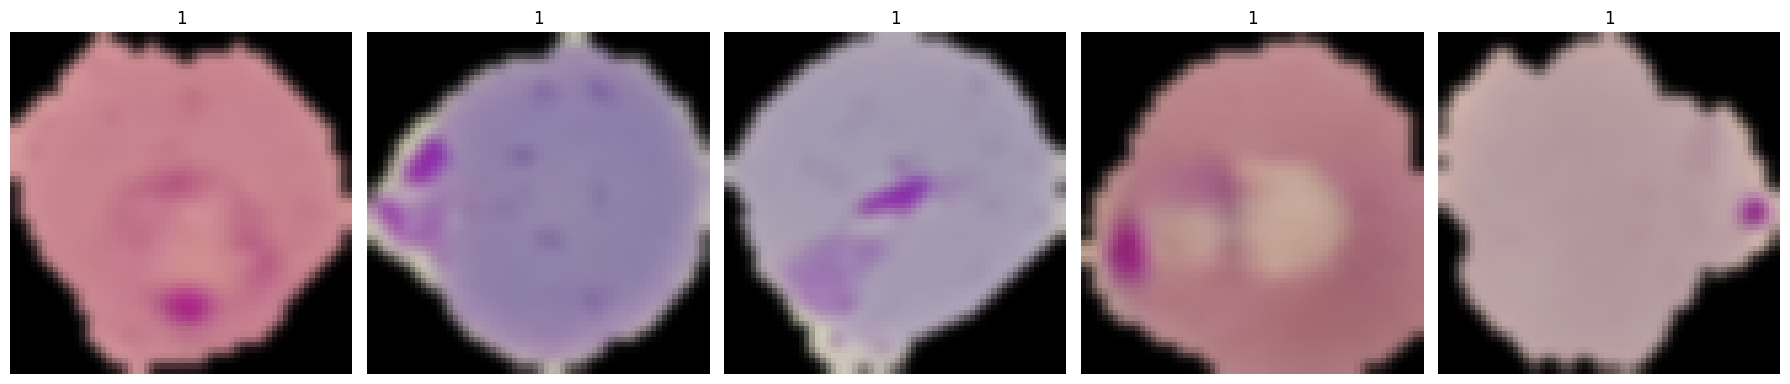

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

### <b> Gaussian Blurring on test data </b>

In [ ]:
gbx_test = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx_test.append(b)

gbx_test = np.array(gbx_test)

#### **Observations and insights:**
Gaussian Blurring may help to make the model more robust in several ways:
- The project objective is to build a reliable model to predict the presence of the Plasmodium parasite in the images, hence False Negatives should be minimized to reduce human cost through Recall Improvement (Correctly Identify Positive Instances)
- Noise reduction: Smooth out the choppy edges in the HSV images, Gaussian blurring can reduce noise and smooth out irregularities.
- Reduce image variation sensitivity - image blurring can improve model focus on image content versus small pixel variations.
- Prevent overfitting: Blurring can be a form of regularization by adding a small amount of noise to the images.
- Data Augmentation - While it is desirable to reduce false negatives, a trade-off exists with introducing false positives or filtering out important image details.  Data Augmentation is another method that minimizes false negatives through improved model recall.


## **Model Building**

### **Base model**

**Note:** The Base model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

### <b> Importing the required libraries for building and training our model </b>

In [ ]:
# Clearing backend
import tensorflow as tf

from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, LeakyReLU, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(23)
import random
random.seed(23)
tf.random.set_seed(23)

#### <b>One Hot Encoding the train and test labels </b>

In [ ]:
# Encoding Train Labels
train_labels = to_categorical(train_labels, num_classes=2)

# Encoding Test Labels
test_labels = to_categorical(test_labels, num_classes=2)

### <b> Building the base model </b>

In [ ]:
# Creating sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

# Flatten the feature maps by transforming to a 1D vector
model.add(Flatten())

# Add dense layers
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

### <b> Compiling the model </b>

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)] # save weights with best validation loss

<b> Fit and train our model

In [ ]:
# Fit the model2 with min batch size as 32 can tune batch size to some factor of 2^power ]
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 15s 5ms/step - loss: 1.4206 - accuracy: 0.6201 - val_loss: 0.5549 - val_accuracy: 0.8211
Epoch 2/20
624/624 [==============================] - 3s 5ms/step - loss: 0.3539 - accuracy: 0.8405 - val_loss: 0.2189 - val_accuracy: 0.8922
Epoch 3/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1474 - accuracy: 0.9471 - val_loss: 0.1710 - val_accuracy: 0.9750
Epoch 4/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1200 - accuracy: 0.9590 - val_loss: 0.1416 - val_accuracy: 0.9834
Epoch 5/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1112 - accuracy: 0.9627 - val_loss: 0.2081 - val_accuracy: 0.9858
Epoch 6/20
624/624 [==============================] - 3s 5ms/step - loss: 0.0953 - accuracy: 0.9687 - val_loss: 0.1023 - val_accuracy: 0.9808
Epoch 7/20
624/624 [==============================] - 3s 5ms/step - loss: 0.0907 - accuracy: 0.9708 - val_loss: 0.1086 - val_accuracy: 0.9814
Epoch

### <b> Evaluating the model on test data </b>

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0750 - accuracy: 0.9815

 Test_Accuracy:- 0.9815384745597839


### **Findings**

- Our model had 1,058,786 trainable parameters.
- Model achieved training accuracy of ~97.6% and a testing accuracy of ~97.9% after 11 epochs.
- Model recall at 97% shown below.

<b> Plotting the confusion matrix

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



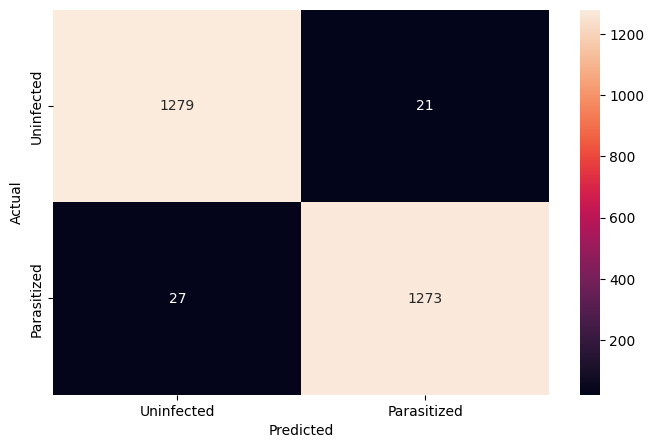

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)
pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [ ]:
# Function to plot train and validation accuracy
def plot_accuracy(history):
    N = len(history.history["accuracy"])
    plt.figure(figsize = (7, 7))
    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

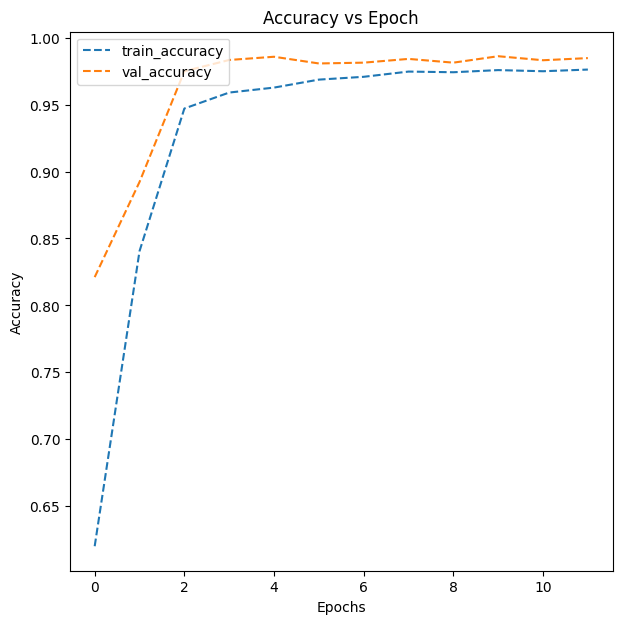

In [ ]:
plot_accuracy(history)

### Observations: ###
* Both the training and validation data have smooth curves increasing for each epoch  
* Validation accuracy is slightly higher than the train accuracy which suggests overlearning

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

### <b> Model 1
#### <b> Trying to improve the performance of our model by adding new layers </b>


In [ ]:
backend.clear_session() # Clearing the backend for new model

### <b> Building the Model </b>

In [ ]:
# Create another sequential model
model1 = Sequential()

# Adding two additional convolutional layers with increased filter sizes
model1.add(Conv2D(filters=32, kernel_size=2, activation='relu', input_shape=(64, 64, 3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=32, kernel_size=2, activation='relu', input_shape=(64, 64, 3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=32, kernel_size=2, activation='relu', input_shape=(64, 64, 3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model1.add(MaxPooling2D(pool_size=2))

# Flatten the feature maps
model1.add(Flatten())

# Adding additional dense layer to base model1 with reduced neuron count
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))

# Output layer
model1.add(Dense(2, activation='softmax'))

# Print model summary
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 63, 63, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        4128      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0

### <b> Compiling the Model </b>

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)] # save weights with best validation loss

<b>Fit and Train the model </b>

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ]
history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 7s 6ms/step - loss: 0.3086 - accuracy: 0.8650 - val_loss: 0.0789 - val_accuracy: 0.9838
Epoch 2/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0855 - accuracy: 0.9745 - val_loss: 0.0735 - val_accuracy: 0.9724
Epoch 3/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0751 - accuracy: 0.9764 - val_loss: 0.0996 - val_accuracy: 0.9613
Epoch 4/20
624/624 [==============================] - 3s 6ms/step - loss: 0.0665 - accuracy: 0.9787 - val_loss: 0.0890 - val_accuracy: 0.9698


### <b> Evaluating the model </b>

In [ ]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0645 - accuracy: 0.9823

 Test_Accuracy:- 0.9823076725006104


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



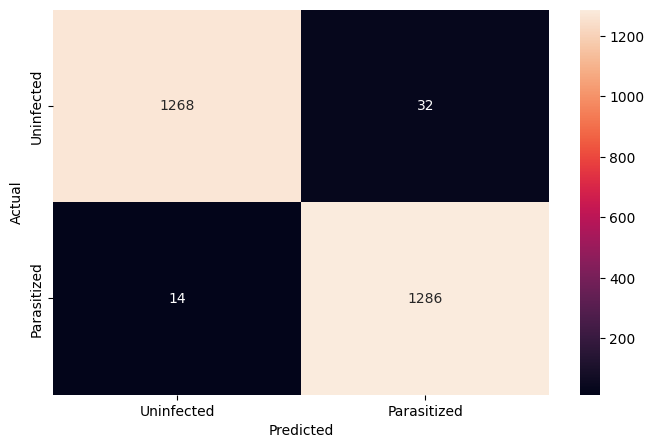

In [ ]:
pred = model1.predict(test_images)
pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Plotting the train and the validation curves

In [ ]:
# Function to plot train and validation accuracy
def plot_accuracy(history1):
    N = len(history1.history["accuracy"])
    plt.figure(figsize = (7, 7))
    plt.plot(np.arange(0, N), history1.history["accuracy"], label = "train_accuracy")
    plt.plot(np.arange(0, N), history1.history["val_accuracy"], label = "val_accuracy")
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

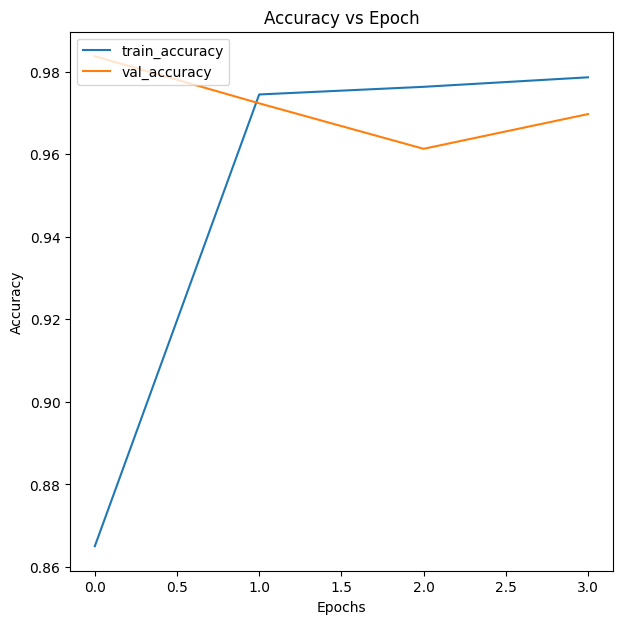

In [ ]:
plot_accuracy(history1)

### **Findings**

- Model had 116,002 trainable parameters.
- Model achieved training accuracy of ~98% and a testing accuracy of ~98% after only 5 epochs.
- Performance might be improved by using Data Augmentation, Batch Normalization and Dropout Layers.
- Model recall rose to 99% with a reduction in False Negatives.
- Mild sawtooth pattern suggests instablility or overlearning during training which can occur if the Learning Rate is too high.  A reduced Learning Rate may provide smoother convergence.  

### Let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

### <b> Model 2 with Batch Normalization </b>

In [ ]:
backend.clear_session()

### <b> Building the model </b>

In [ ]:
# Create a sequential model
model2 = Sequential()

# Adding LeakyReLu activation and Batch Normalization to model
model2.add(Conv2D(filters=32, kernel_size=2, activation='LeakyReLU', input_shape=(64, 64, 3)))
model2.add(MaxPooling2D(pool_size=2))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=32, kernel_size=2, activation='LeakyReLU', input_shape=(64, 64, 3)))
model2.add(MaxPooling2D(pool_size=2))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=32, kernel_size=2, activation='LeakyReLU', input_shape=(64, 64, 3)))
model2.add(MaxPooling2D(pool_size=2))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=64, kernel_size=2, activation='LeakyReLU'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=128, kernel_size=2, activation='LeakyReLU'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(BatchNormalization())

# Flatten the feature maps
model2.add(Flatten())

# Adding additional dense layer to base model with reduced neuron count
model2.add(Dense(256, activation='LeakyReLU'))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='LeakyReLU'))
model2.add(Dropout(0.5))

# Output layer
model2.add(Dense(2, activation='softmax'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 63, 63, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                        

### <b>Compiling the model </b>

In [ ]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model </b>

In [ ]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 9s 8ms/step - loss: 0.2098 - accuracy: 0.9142 - val_loss: 0.0896 - val_accuracy: 0.9820
Epoch 2/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0968 - accuracy: 0.9676 - val_loss: 0.0578 - val_accuracy: 0.9878
Epoch 3/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0813 - accuracy: 0.9734 - val_loss: 0.0732 - val_accuracy: 0.9818
Epoch 4/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0751 - accuracy: 0.9771 - val_loss: 0.1566 - val_accuracy: 0.9661


<b>Plotting the train and validation accuracy

In [ ]:
def plot_accuracy(history2):
    N = len(history2.history["accuracy"])
    plt.figure(figsize = (7, 7))
    plt.plot(np.arange(0, N), history2.history["accuracy"], label = "train_accuracy")
    plt.plot(np.arange(0, N), history2.history["val_accuracy"], label = "val_accuracy")
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")


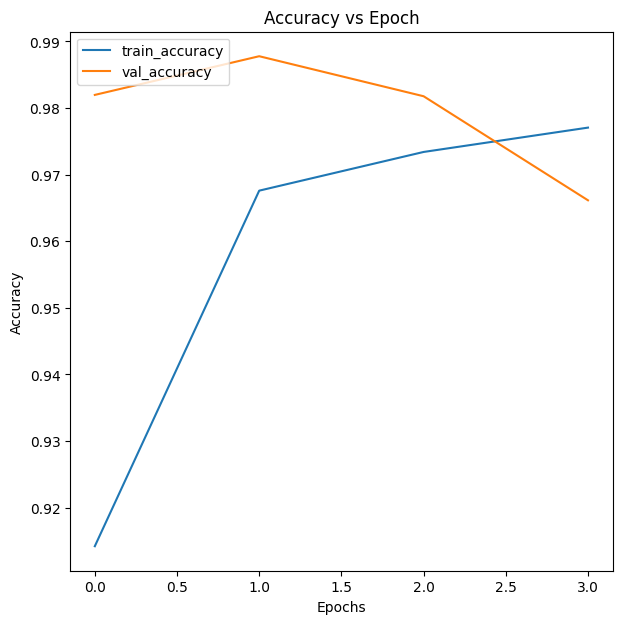

In [ ]:
plot_accuracy(history2)

### <b>Evaluating the model </b>

In [ ]:
accuracy2 = model2.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy2[1])

82/82 [==============================] - 1s 4ms/step - loss: 0.0935 - accuracy: 0.9727

 Test_Accuracy:- 0.9726923108100891


### Observations and Insights:

- Model 2 had 116,578 trainable parameters.
- Model converged rapidly acheiving a training accuracy of ~98% and a testing accuracy of ~97% after only 4 epochs, and there were only 11 False Negatives.
- The Validation curve starts above the training curve and then declines to intersect and move below the training curve after a few epochs which suggests that the model is overfitting the training data. Performance improvements might be possible by reducing model complexity and by using Data Augmentation and Regularization.

<b> Generate the classification report and confusion matrix

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1300
           1       0.95      0.99      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



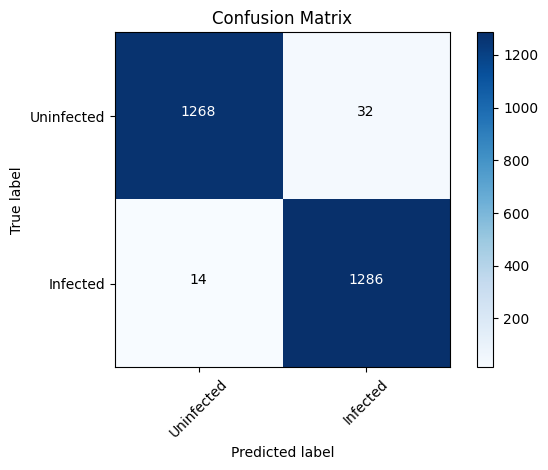

In [ ]:
pred = model2.predict(test_images)
pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Setting the threshold for annotating the cells in the confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

### **Model Improvements:**<br>

* Can we improve the model1 with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





### <b> Model 3 with Data Augmentation </b>

In [ ]:
backend.clear_session() # Clearing backend for new model

### <b> Use image data generator </b>

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=23)

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip=True, zoom_range=0.5, rotation_range=30)
val_datagen = ImageDataGenerator()

# Training images using train_datagen generator
train_generator = train_datagen.flow(x=X_train, y=y_train, batch_size=64, seed=23, shuffle=True)

# Validation images using val_datagen generator
val_generator = val_datagen.flow(x=X_val, y=y_val, batch_size=64, seed=23, shuffle=True)

### **Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



#### <B>Visualizing Augmented images

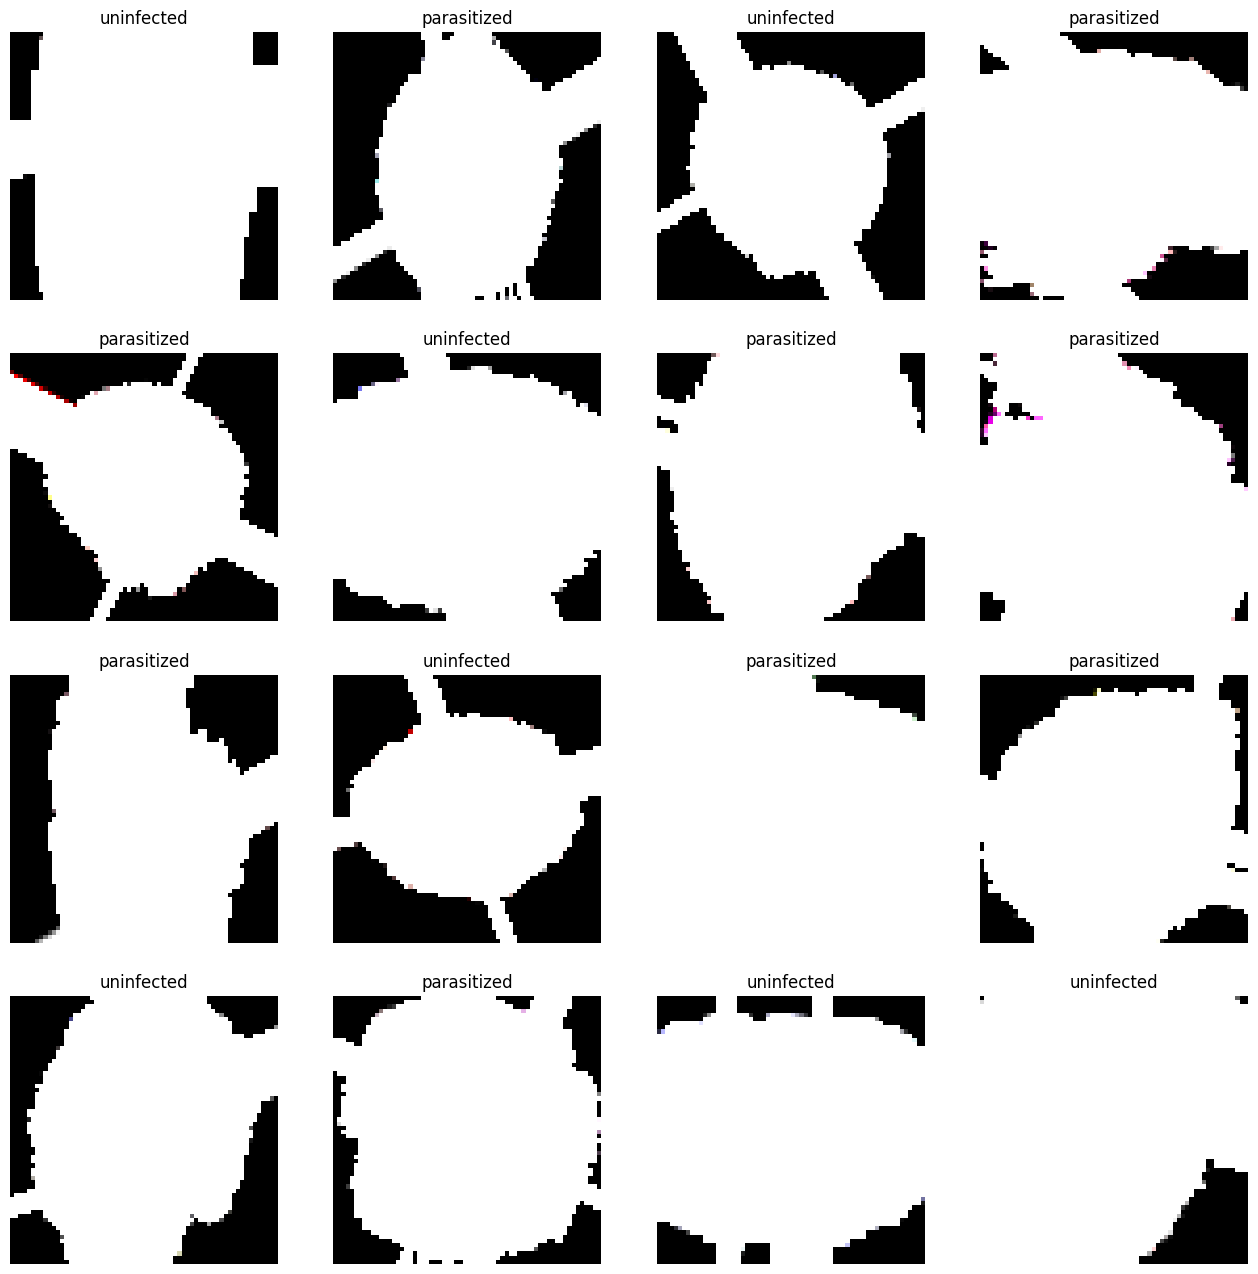

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[1] == 1:
        ax.set_title('parasitized')
    else:
        ax.set_title('uninfected')
    ax.axis('off')

#### <b>Observations and insights: </b>

### <b>Building Model 3 </b>

In [ ]:
from tensorflow.keras import optimizers
model3 = Sequential()

model3.add(Conv2D(filters=64, kernel_size=2, activation='LeakyReLU', input_shape=(64, 64, 3)))
model3.add(MaxPooling2D(2,2))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=32, kernel_size=2, activation='LeakyReLU', input_shape=(64, 64, 3)))
model3.add(MaxPooling2D(2,2))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=32, kernel_size=2, activation='LeakyReLU', input_shape=(64, 64, 3)))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(filters=16, kernel_size=2, activation='LeakyReLU', input_shape=(64, 64, 3)))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(2, activation='sigmoid'))

adam = optimizers.legacy.Adam(learning_rate=0.001)
model3.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 63, 63, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                        

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model </b>

In [ ]:
history3 = model3.fit(train_generator, validation_data = val_generator, batch_size = 32, callbacks = callbacks, epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 24s 72ms/step - loss: 0.3301 - accuracy: 0.8578 - val_loss: 0.2804 - val_accuracy: 0.9297
Epoch 2/20
312/312 [==============================] - 22s 71ms/step - loss: 0.1877 - accuracy: 0.9382 - val_loss: 0.1030 - val_accuracy: 0.9708
Epoch 3/20
312/312 [==============================] - 22s 71ms/step - loss: 0.1639 - accuracy: 0.9463 - val_loss: 0.0852 - val_accuracy: 0.9726
Epoch 4/20
312/312 [==============================] - 22s 71ms/step - loss: 0.1482 - accuracy: 0.9521 - val_loss: 0.0834 - val_accuracy: 0.9744
Epoch 5/20
312/312 [==============================] - 22s 71ms/step - loss: 0.1484 - accuracy: 0.9512 - val_loss: 0.0794 - val_accuracy: 0.9746
Epoch 6/20
312/312 [==============================] - 22s 71ms/step - loss: 0.1409 - accuracy: 0.9509 - val_loss: 0.0786 - val_accuracy: 0.9758
Epoch 7/20
312/312 [==============================] - 22s 71ms/step - loss: 0.1371 - accuracy: 0.9543 - val_loss: 0.0706 - val_accuracy:

### <b>Evaluating the model </b>

<b>Plot the train and validation accuracy

In [ ]:
def plot_accuracy(history3):
    N = len(history3.history["accuracy"])
    plt.figure(figsize = (7, 7))
    plt.plot(np.arange(0, N), history3.history["accuracy"], label = "train_accuracy")
    plt.plot(np.arange(0, N), history3.history["val_accuracy"], label = "val_accuracy")
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

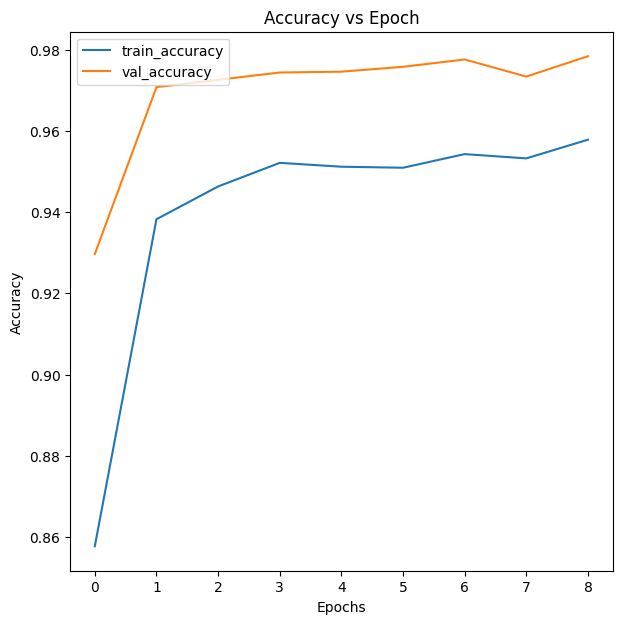

In [ ]:
plot_accuracy(history3)

### Evaluating Model 3

In [ ]:
# Evaluating model3 on test data
accuracy3 = model3.evaluate(train_generator, verbose=1)
print('\n', 'Test Accuracy:', accuracy3[1])

312/312 [==============================] - 22s 69ms/step - loss: 0.1296 - accuracy: 0.9590

 Test Accuracy: 0.9590303301811218


### Observations and Insights:

- Model 3 had less than half of the trainable parameters as Model 2, and yet converged after only 6 epochs but with less accuracy.
- Model 3 achieved a training accuracy of ~95% and a testing accuracy of ~95% after 6 epochs.
- Model had reduce recall at 97% for FNs which rose to 38.
- The Validation curve starts above the training curve which suggests that the model is overfitting the training data. Performance improvements might be possible by reducing model complexity and by using Data Augmentation and Regularization.

<B>Plotting the classification report and confusion matrix

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



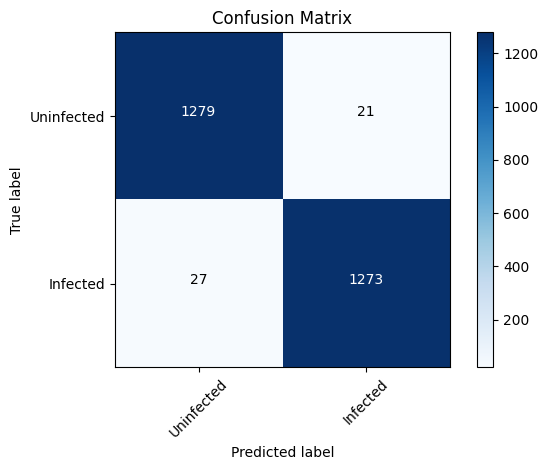

In [ ]:
pred = model.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

# Plotting the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Setting the threshold for annotating the cells in the confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(23)
import random
random.seed(23)
tf.random.set_seed(23)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

# Since include_top = False, the input image shape must be specified
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(64, 64, 3))
vgg.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
# Getting only the conv layers for transfer learning.
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

x = Flatten()(transfer_layer.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
pred = Dense(2, activation='softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

### <b>Compiling the model </b>

In [ ]:
model4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history4 = model4.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 7s 7ms/step - loss: 0.1562 - accuracy: 0.9430 - val_loss: 0.1611 - val_accuracy: 0.9375
Epoch 2/20
624/624 [==============================] - 4s 7ms/step - loss: 0.1156 - accuracy: 0.9585 - val_loss: 0.1154 - val_accuracy: 0.9599
Epoch 3/20
624/624 [==============================] - 4s 6ms/step - loss: 0.1060 - accuracy: 0.9624 - val_loss: 0.0941 - val_accuracy: 0.9698
Epoch 4/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0981 - accuracy: 0.9655 - val_loss: 0.1363 - val_accuracy: 0.9513
Epoch 5/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0929 - accuracy: 0.9648 - val_loss: 0.1014 - val_accuracy: 0.9653


<b>Plot the train and validation accuracy

In [ ]:
def plot_accuracy(history4):
    N = len(history4.history["accuracy"])
    plt.figure(figsize = (7, 7))
    plt.plot(np.arange(0, N), history4.history["accuracy"], label = "train_accuracy")
    plt.plot(np.arange(0, N), history4.history["val_accuracy"], label = "val_accuracy")
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

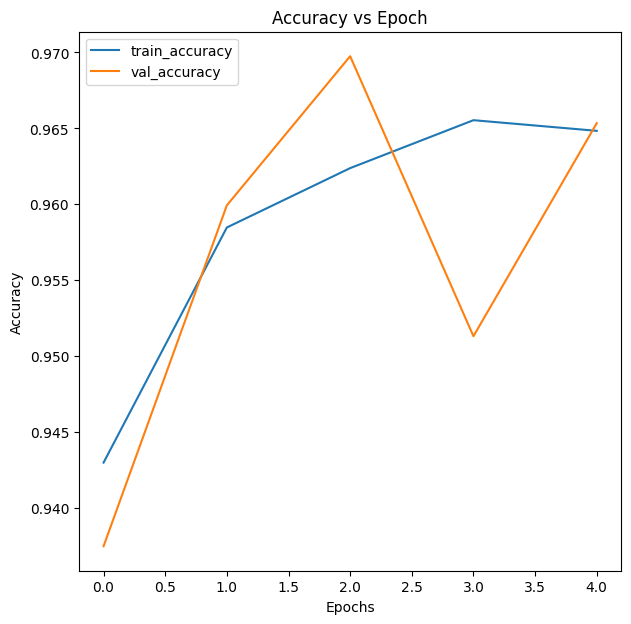

In [ ]:
plot_accuracy(history4)

### <b> Evaluating model 4</b>

In [ ]:
# Evaluating model4 on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy4[1])


82/82 [==============================] - 1s 7ms/step - loss: 0.1059 - accuracy: 0.9619

 Test_Accuracy:- 0.9619230628013611


### **Observations and insights:**

- Model 4 had 14,714,688 trainable parameters.
- The validation curves pronounced sawtooth pattern suggest that model 4 struggled to generalize well on the data it was seeing.  Model improvements can be realized fine tuning the model and through increased regularization, and careful evaluation of the hyperparameters.
- The model achieved a training accuracy of ~97% and a testing accuracy of 95.6% after 8 epochs.



<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1300
           1       0.95      0.97      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



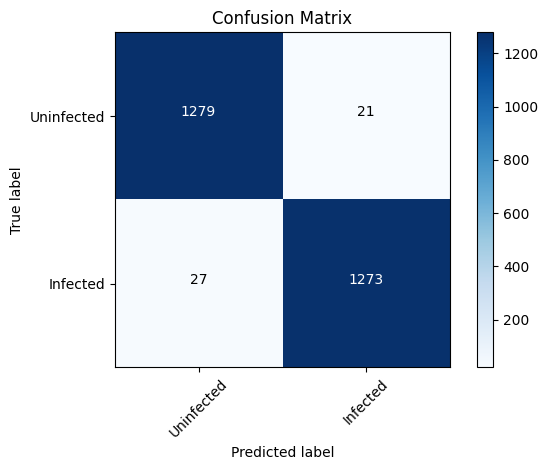

In [ ]:
pred = model4.predict(test_images)
pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Setting the threshold for annotating the cells in the confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

### <b>Observations: </b>
*  Model 4 classification shows the VGG16 transfer learning architecture and the over 14.7 million trainable parameters in the model.>

*  Model 1 had the highest accuracy on the training and testing data at ~98% and had a recall of 99% with only 11 False Negatives.>

In [ ]:
final_model = model1
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 63, 63, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        4128      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0

#### <b> Observations and Conclusions drawn from Final Model: </b>
- The Final Model (Model 1) is the simplest of the four models considered and appears to have suffered least from overfitting and had a shorter  training time than VGG16.  
- Final Model had 116,002 trainable parameters and achieved training accuracy of ~98% and a testing accuracy of ~98% after only 5 epochs.  Further performance improvements might be achieved by using Data Augmentation, Batch Normalization and Dropout Layers.  
- Model recall rose to 99% due to a reduction in the number of False Negatives.  The mild sawtooth Training/Validation curve patterns suggests some instability or over-learning during training which can occur if the Learning Rate is too high.  A reduced Learning Rate may provide smoother convergence.

**Improvements that can be done:**<br>

Model performance improvements may be possible by using different pre-trained models or different CNN architectures such as VGG19, ResNet, and Inception.  Each model has its own particular strengths and weaknesses, thus trade-offs often necessary when choosing a model solution.  Transfer learning with fine-tuning instead of using the pre-trained models may be an option to consider.

Custom CNN architectures would allow more flexibility and control over model design with different layer configurations, activation functions, regularization techniques, and other architectural choices.

Ensemble models can optimize model performance by combining the predictions of multiple models using methods like voting.

Different hyperparameter settings can improve model performance as well, this includes modifying the learning rate, batch size, optimizer, regularization strength, and dropout rate.


There are other viable models and architectures to consider besides CNNs; Random Forest, Support Vector Machines, and Logistic Regression for example.

#### **Insights**

#### **Refined insights**:
The most meaningful insights from the data from my perspective is the human cost for undetected malaria infections, thus excellent (99%) model Recall is critical while not allowing an excess of False Positives.  While undergoing treatment for the disease when it is not necessary may not be pleasant, it is preferable to allowing malaria going undetected due to the potentially devastating consequences.

#### **Comparison of various techniques and their relative performance**:
Many modeling techniques and features were employed in the four models in this project beyond the base model, such as Max Pooling, Batch Normalization, and adding Dropout Layers.  The most significant technique appears to be Max Pooling used in Final Model, Max Pooling's main purpose is to extract the most dominant features from the input feature maps and discard less relevant information.  Further model improvements are within scope with further customization of the Final Model CNN architecture.  It is the simplest, most accurate, and fastest with the lowest computational cost.  It is also within scope to compare this CNN Model to other the binary classification models mentioned as well as a form of validation.

#### **Final solution**:
The CNN Final Model (model 1) appears to be the best option because of model simplicity, speed, accuracy, and recall.  This model should be validated against other binary classifiers (SVM, Random Forest, Logistic Regression) as the CNN architecture was assumed to be the best algorithm available.  

This application of machine learning offers as an option to the microscopic diagnostic method.  The method involves examining a blood smear under a microscope to identify the malaria parasite. Microscopy is considered the best way to provide a malaria diagnosis. However, its accuracy can be influenced by factors such as the skill and experience of the microscopist. Studies have reported sensitivities ranging from 80% to 95% and specificities ranging from 90% to 100% for microscopic diagnosis.

The potential benefits of this type of CNN model over the long term could be significant if we consider some basic assumptions.  The annual death rate from malaria varies buy the WHO reported over 400,000 deaths from malaria in 2019, using these figures, a 5-10% sensitivity improvement is significant by identifying true positives to a high degree of accuracy while minimizing false negatives.  This type of incremental process improvement will reduce the burden on medical and laboratory personnel and ultimately reduce the cost of treatment of the disease by helping to ensure that the patients that are diagnosed correctly get treatment in a timely manner.

